<a href="https://colab.research.google.com/github/hyydrra/MLP-Regression-AutoEncoder_RBM_AutoEncoder/blob/master/MLP_Stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import copy

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1

In [ ]:
def plot_loss_mse_mae_accuracy(history,what_to_plot):
  figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(history.history[what_to_plot])
  plt.plot(history.history['val_'+what_to_plot])
  plt.title(what_to_plot + " plot per epochs" )
  plt.ylabel(what_to_plot)
  plt.xlabel('epoch')
  plt.legend(['train_data', 'validation_data'], loc='upper right')
  plt.show()


def plot_confusion_matrix(cm, title='Confusion matrix', cmap='viridis'):
  
    figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
           plt.text(j, i, cm[i,j],ha="center", va="center")

    plt.tight_layout()
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## MADLINE Implementation

make data

In [ ]:
def plot_line(w,b,xlim,color0):
  a = -w[0]/w[1]
  b1 = -b/w[1]
  x = np.linspace(xlim[0], xlim[1],100)
  y = a*x+b1
  plt.plot(x, y, color=color0)

def plot_scatter(all_data):
  for i in range(len(all_data)):
    if all_data[i][1]==1:
      color = "blue"
    elif all_data[i][1]==2:
      color = "red"
    else:
      color = "green"
    plt.scatter(all_data[i][0][0],all_data[i][0][1],color=color)

In [ ]:
def data_gen(mu, sigma, num_data, label):
  data_2d=[]
  x1 = np.random.normal(mu[0], sigma[0], num_data) 
  x2 = np.random.normal(mu[1], sigma[1], num_data)
  for i in range(num_data):
    data_2d.append([[x1[i], x2[i]], label])

  return data_2d


mu1, sigma1 = [3, 2.5], [0.2, 0.3]
mu2, sigma2 = [1, 2], [0.2, 0.2]
num_data1=50
num_data2=50
class1 = data_gen(mu1, sigma1, num_data1, 1)
class2 = data_gen(mu2, sigma2, num_data2, 2)

class3 = [[[0, 2], 3], [[1, 1], 3], [[1, 3.5], 3],
          [[2, 1], 3], [[2, 2], 3], [[2, 3], 3],
          [[3, 1], 3], [[3, 4], 3], [[4, 2], 3],
          [[4, 1], 3], [[4, 3], 3], [[3.8, 3.5], 3]]
for i in range(len(class3)):
  class3[i][0] = np.asanyarray(class3[i][0]) 
     
all_data = class1 + class2 + class3

(0.0, 4.5)

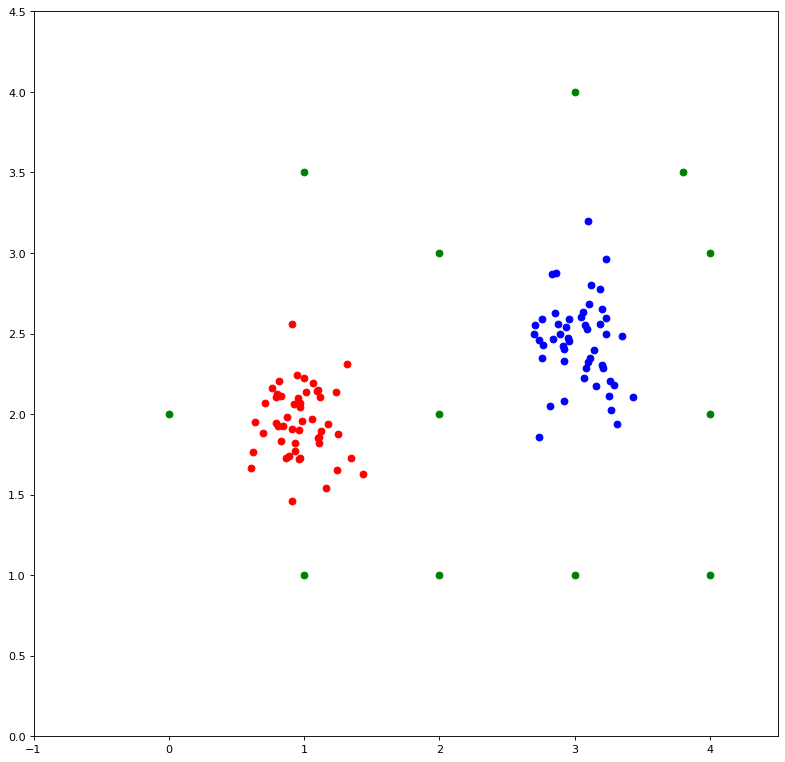

In [ ]:
figure(num=None, figsize=(12,12), dpi=80, facecolor='w', edgecolor='k')
plot_scatter(all_data)
plt.xlim(-1, 4.5)
plt.ylim(0, 4.5)


In [ ]:
def sign_vec(inputt):
  out = np.ones(len(inputt))
  for i in range(len(inputt)):
    if inputt[i]<0:
      out[i] = -1
  return out

def madline(all_data,num_norons,epochs):

  
  w = np.random.normal(0, 0.5, (num_norons, 2))
  b = np.zeros(num_norons)
  l = 0.001

  for e1 in range(epochs):
    correct = 0
    for i in range(len(all_data)):

      net = np.dot(w,all_data[i][0]) + b
      h = sign_vec(net)

      dw = l * all_data[i][1] * np.asanyarray(all_data[i][0])

      if all_data[i][1] == 1:
        if h.sum() != num_norons:
          for j in range (num_norons):
            if h[j] == -1:
              w[j] = w[j] + dw
              b[j] = b[j] + l * all_data[i][1]
          # w = w + dw
          # b = b + l * all_data[i][1]
          # nearest_line = np.argmin(net)
          # w[nearest_line] = w[nearest_line] + dw
          # b[nearest_line] = b[nearest_line] + l * all_data[i][1]
        else:
          correct = correct + 1

      if all_data[i][1] == -1:
        if h.sum() == num_norons:
          w = w + dw
          b = b + l * all_data[i][1]
          # nearest_line = np.argmin(net)
          # w[nearest_line] = w[nearest_line] + dw
          # b[nearest_line] = b[nearest_line] + l * all_data[i][1]

        else:
          correct = correct + 1

    
    if correct == len(all_data):
      break
  print("Accuracy: ",correct/len(all_data))
  return w,b


def one_hot_data(data, hot_class):
  temp = copy.deepcopy(data)
  for i in range(len(data)):
    if data[i][1] == hot_class:
      temp[i][1] = 1
    else:
      temp[i][1] = -1
  return temp   

In [ ]:
epochs = 500
num_norons1 = 3
num_norons2 = 3
data1 = one_hot_data(all_data,1)
data2 = one_hot_data(all_data,2)

w1,b1 = madline(data1,num_norons1,epochs)
w2,b2 = madline(data2,num_norons2,epochs)

Accuracy:  1.0
Accuracy:  1.0


(-1.0, 5.0)

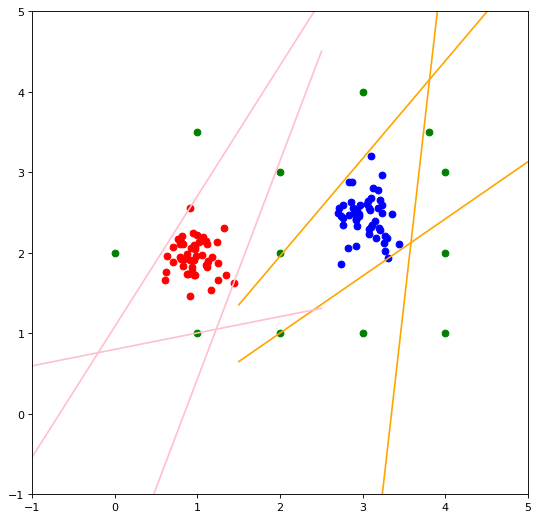

In [ ]:
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(w1)):
  plot_line(w1[i],b1[i],[1.5,5],"orange")
for i in range(len(w2)):
  plot_line(w2[i],b2[i],[-1,2.5],"pink")

plot_scatter(all_data)
plt.xlim(-1, 5.0)
plt.ylim(-1, 5.0)

## House Price prediction MLP Regression

In [ ]:
data = pd.read_csv("/content/drive/My Drive/House Sales.csv")
train, test = train_test_split(data.iloc[0:5000,2:], test_size=0.2)

preparing data

In [ ]:
none_norm_train = train.drop(columns=["price"])
train_data = (none_norm_train - none_norm_train.min())/(none_norm_train.max() - none_norm_train.min())
train_label = (train["price"] - train["price"].min())/(train["price"].max() - train["price"].min())

none_norm_test = test.drop(columns=["price"])
test_data = (none_norm_test - none_norm_train.min())/(none_norm_train.max() - none_norm_train.min())
norm_test_label = (test["price"] - train["price"].min())/(train["price"].max() - train["price"].min())
test_label = test["price"]



defining model and training

In [ ]:
def my_optimizer():
  return keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(100, input_dim=train_data.shape[1], activation='relu'))
  model.add(layers.Dense(30, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer = my_optimizer(), metrics=['mse','mae'])
  return model

def step_decay(epoch):
  initial_lrate = 0.001
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

In [ ]:
model = build_model()
model.summary()

lrate = keras.callbacks.LearningRateScheduler(step_decay, verbose=0)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)
history = model.fit(train_data, train_label,
                    epochs=100,
                    batch_size=20,
                    validation_split = 0.2,
                    # validation_data=(test_data, norm_test_label),
                    callbacks=[early_stop, lrate])

ploting loss and metrics per epoch

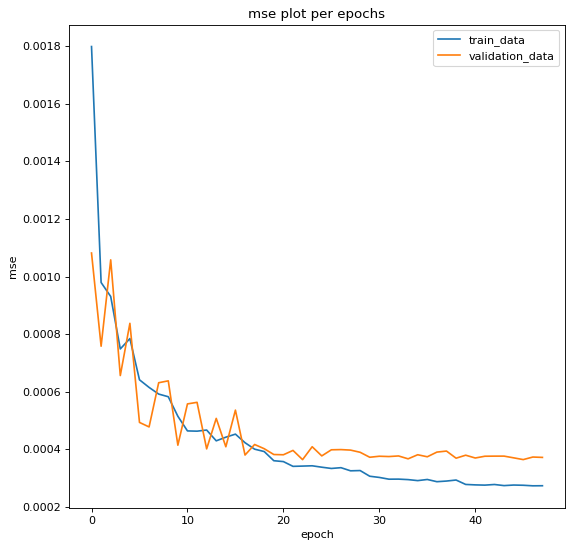

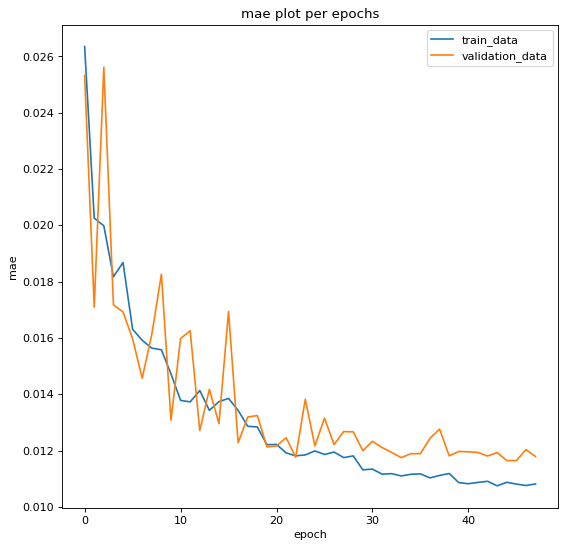

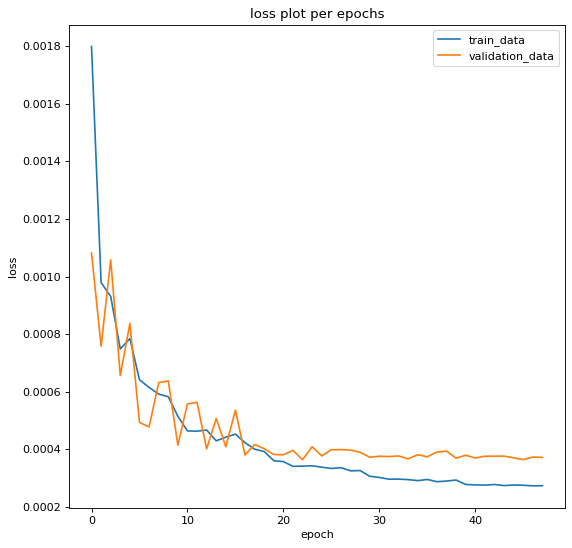

In [ ]:
plot_loss_mse_mae_accuracy("mse")
print("\n")
plot_loss_mse_mae_accuracy("mae")
print("\n")
plot_loss_mse_mae_accuracy("loss")

evaluate model

In [ ]:
loss, mse, mae = model.evaluate(test_data, norm_test_label, verbose=2)
norm_test_predictions = model.predict(test_data).flatten()
test_predictions = (norm_test_predictions * (train["price"].max() - train["price"].min())) + train["price"].min()

predection_error = test_label - test_predictions
predection_error = predection_error.abs()
mae__none_normalized_prices = predection_error.sum()/test_label.shape
print("\nMean absolute error for none normalized prices: ",mae__none_normalized_prices[0])

32/32 - 0s - loss: 3.6470e-04 - mse: 3.7193e-04 - mae: 0.0118

Mean absolute error for none normalized prices:  82285.434640625


In [ ]:
for i in range(100):
  print("real price: ", test_label.iloc[i], "   pridected price: ", test_predictions[i], "  error: ", test_label.iloc[i] - test_predictions[i],"\n")

real price:  297500.0    pridected price:  304158.53   error:  -6658.53125 

real price:  692500.0    pridected price:  1236676.1   error:  -544176.125 

real price:  532170.0    pridected price:  494646.66   error:  37523.34375 

real price:  280000.0    pridected price:  261304.9   error:  18695.09375 

real price:  446500.0    pridected price:  772827.3   error:  -326327.3125 

real price:  216000.0    pridected price:  215362.8   error:  637.203125 

real price:  850830.0    pridected price:  969621.5   error:  -118791.5 

real price:  930000.0    pridected price:  890348.56   error:  39651.4375 

real price:  761000.0    pridected price:  562936.44   error:  198063.5625 

real price:  295450.0    pridected price:  281388.44   error:  14061.5625 

real price:  753888.0    pridected price:  722549.94   error:  31338.0625 

real price:  1000000.0    pridected price:  570468.6   error:  429531.375 

real price:  234000.0    pridected price:  246442.75   error:  -12442.75 

real price:

## FMNIST MLP

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
norm_train_data = train_data/255
norm_test_data = test_data/255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
def my_optimizer():
  return keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(128, activation='relu', activity_regularizer=l1(0.001)))
  model.add(layers.Dense(64, activation='relu', activity_regularizer=l1(0.001)))
  model.add(layers.Dense(10))
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = my_optimizer(),  metrics=['accuracy'])
  return model

def step_decay(epoch):
  initial_lrate = 0.002
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

In [ ]:
batchsize = 256
num_epochs = 100
model = build_model()
model.summary()

lrate = keras.callbacks.LearningRateScheduler(step_decay, verbose=0)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
myhistory = model.fit(norm_train_data, train_label,
                    epochs=num_epochs,
                    batch_size=batchsize,
                    validation_split = 0.2,
                    # validation_data=(norm_test_data, test_label),
                    callbacks=[early_stop, lrate])

In [ ]:
test_loss, test_acc = model.evaluate(norm_test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.3959 - accuracy: 0.8897

Test accuracy: 0.8896999955177307

Test loss: 0.3958635926246643


In [ ]:
plot_loss_mse_mae_accuracy(myhistory,"loss")
print("\n")
plot_loss_mse_mae_accuracy(myhistory,"accuracy")

In [ ]:
predictions = model.predict(norm_test_data)
predicted_labels=[]
for pred in predictions:
  predicted_labels.append(np.argmax(pred))

<Figure size 432x288 with 0 Axes>

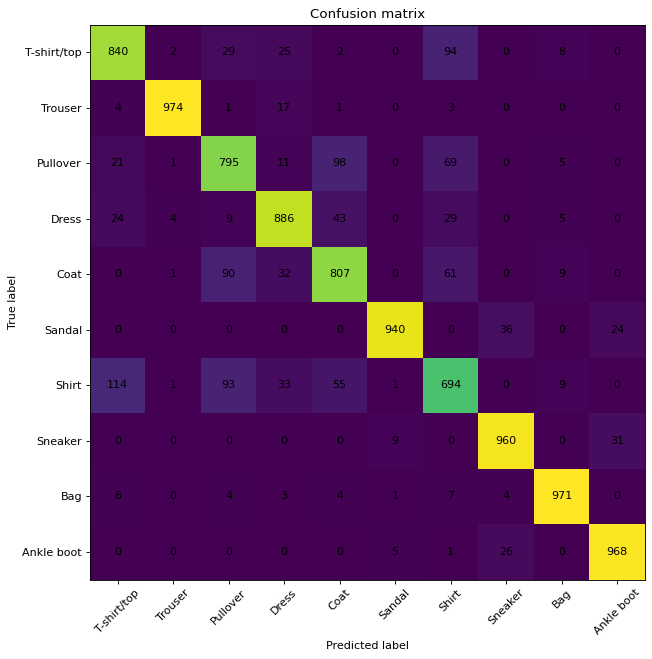

In [ ]:
color_maps =['viridis',
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cm = confusion_matrix(test_label, predicted_labels)
np.set_printoptions(precision=2)
# print('Confusion matrix: ')
# print(cm)
plt.figure()
plot_confusion_matrix(cm,cmap=color_maps[0])

## Dimention Reduction Methods

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
def flat_2d_data(data):
  flatten_data=[]
  for i in range(data.shape[0]):
    flatten_data.append([])
    flatten_data[i] = data[i].flatten() 
  return np.asarray(flatten_data)

norm_train_data = train_data/255
norm_test_data = test_data/255

norm_train_data = flat_2d_data(norm_train_data)
norm_test_data = flat_2d_data(norm_test_data)

In [ ]:
def my_optimizer():
  return keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def build_model_Q4(input_size):
  model = keras.Sequential()
  model.add(layers.Dense(128, activation='relu',input_dim = input_size, activity_regularizer=l1(0.001)))
  model.add(layers.Dense(64, activation='relu', activity_regularizer=l1(0.001)))
  model.add(layers.Dense(10))
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = my_optimizer(),  metrics=['accuracy'])
  return model

def step_decay(epoch):
  initial_lrate = 0.002
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate


batchsize = 32
num_epochs = 100
lrate = keras.callbacks.LearningRateScheduler(step_decay, verbose=0)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

### pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.9)
pca.fit(norm_train_data)
print("number of selected compponnents: ",pca.n_components_)

number of selected compponnents:  84


In [ ]:
norm_train_data_pca = pca.transform(norm_train_data)
norm_test_data_pca = pca.transform(norm_test_data)

In [ ]:
model_pca = build_model_Q4(pca.n_components_)
model_pca.summary()
history = model_pca.fit(norm_train_data_pca, train_label,
                    epochs=num_epochs,
                    batch_size=batchsize,
                    # validation_split = 0.2,
                    validation_data=(norm_test_data_pca, test_label),
                    callbacks=[early_stop, lrate])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10880     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 19,786
Trainable params: 19,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4814 - accuracy: 0.8511 - val_loss: 0.4390 - val_accuracy: 0.8612 - lr: 0.0020
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3633 - accuracy: 0.8842 - val_loss: 0.3800 - val_accuracy: 0.8775 - lr: 0.0020
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/st

In [ ]:
 test_loss, test_acc = model_pca.evaluate(norm_test_data_pca,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.4450 - accuracy: 0.8858

Test accuracy: 0.8858000040054321

Test loss: 0.44502711296081543


### autoencoder

In [ ]:
def build_auto_encoder(out_dimension):
  model = keras.Sequential()
  model.add(layers.Dense(4*out_dimension, activation='relu',input_dim = 784))
  model.add(layers.Dense(2*out_dimension, activation='relu'))
  model.add(layers.Dense(out_dimension, activation='relu',name="out_encoders"))
  model.add(layers.Dense(2*out_dimension, activation='relu'))
  model.add(layers.Dense(4*out_dimension, activation='relu'))
  model.add(layers.Dense(784, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = "adam")
  return model

In [ ]:
auto_encoder_model = build_auto_encoder(84)
auto_encoder_model.summary()

In [ ]:
history = auto_encoder_model.fit(norm_train_data, norm_train_data,
                    epochs=10,
                    batch_size=20,
                    validation_split = 0.2,
                    callbacks=[early_stop, lrate])

In [ ]:
out_auto_encoder = auto_encoder_model.predict(norm_train_data)

In [ ]:
plt.imshow(norm_train_data[0].reshape(28, 28))
plt.gray()
plt.show()
plt.imshow(out_auto_encoder[0].reshape(28, 28))
plt.gray()
plt.show()

In [ ]:
layer_output = auto_encoder_model.get_layer("out_encoders").output
intermediate_model = keras.models.Model(inputs = auto_encoder_model.input,outputs=layer_output)

In [ ]:
encoded_train_data = intermediate_model.predict(norm_train_data)
encoded_test_data = intermediate_model.predict(norm_test_data)

In [ ]:
model_auto_encoder = build_model_Q4(84)
model_auto_encoder.summary()
history = model_auto_encoder.fit(encoded_train_data, train_label,
                    epochs=num_epochs,
                    batch_size=batchsize,
                    validation_split = 0.2,
                    # validation_data=(norm_test_data, test_label),
                    callbacks=[early_stop, lrate])

In [ ]:
 test_loss, test_acc = model_auto_encoder.evaluate(encoded_test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

### RBM auto encoder

In [ ]:
class LayerTranspose(keras.layers.Layer):
  def __init__(self, dense, activation, **kwargs):
    self.dense = dense
    self.activation = keras.activations.get(activation)
    super().__init__(**kwargs)
  
  def build(self, batch_input_shape):
    self.biases = self.add_weight(name = "bias",
                                  shape = [self.dense.input_shape[-1]],
                                  initializer = "zeros")
    super().build(batch_input_shape)
  
  def call(self, inputs):
    z = tf.matmul(inputs, self.dense.weights[0], transpose_b = True)
    return self.activation(z + self.biases)

In [ ]:
def build_RBM_encoder(out_dimension):
  model = keras.Sequential()
  
  layer0 = layers.Flatten(input_shape=(28*28,1))
  layer1 = layers.Dense(784, activation='relu')
  layer2 = layers.Dense(4*out_dimension, activation='relu')
  layer3 = layers.Dense(2*out_dimension, activation='relu')
  layer4 = layers.Dense(out_dimension, activation='relu',name="out_encoders")

  model.add(layer0)
  model.add(layer1)
  model.add(layer2)
  model.add(layer3)
  model.add(layer4)

  model.add(LayerTranspose(layer4, activation='relu'))
  model.add(LayerTranspose(layer3, activation='relu'))
  model.add(LayerTranspose(layer2, activation='relu'))
  model.add(LayerTranspose(layer1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = "adam")
  return model

In [ ]:
RBM_encoder_model = build_RBM_encoder(84)
RBM_encoder_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_38 (Dense)             (None, 336)               263760    
_________________________________________________________________
dense_39 (Dense)             (None, 168)               56616     
_________________________________________________________________
out_encoders (Dense)         (None, 84)                14196     
_________________________________________________________________
layer_transpose_7 (LayerTran (None, 168)               14364     
_________________________________________________________________
layer_transpose_8 (LayerTran (None, 336)              

In [ ]:
history = RBM_encoder_model.fit(norm_train_data, norm_train_data,
                    epochs=15,
                    batch_size=256,
                    validation_split = 0.2,
                    callbacks=[early_stop, lrate])

Epoch 1/15
188/188 [==============================] - 13s 69ms/step - loss: 0.2874 - val_loss: 0.2858 - lr: 0.0020
Epoch 2/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2820 - val_loss: 0.2815 - lr: 0.0020
Epoch 3/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2785 - val_loss: 0.2785 - lr: 0.0020
Epoch 4/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2759 - val_loss: 0.2775 - lr: 0.0020
Epoch 5/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2740 - val_loss: 0.2748 - lr: 0.0020
Epoch 6/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2725 - val_loss: 0.2739 - lr: 0.0020
Epoch 7/15
188/188 [==============================] - 13s 68ms/step - loss: 0.2713 - val_loss: 0.2726 - lr: 0.0020
Epoch 8/15
188/188 [==============================] - 13s 69ms/step - loss: 0.2700 - val_loss: 0.2716 - lr: 0.0020
Epoch 9/15
188/188 [==============================] - 13s 68ms/step - loss: 0.26

In [ ]:
layer_output = RBM_encoder_model.get_layer("out_encoders").output
intermediate_model = keras.models.Model(inputs = RBM_encoder_model.input,outputs=layer_output)

In [ ]:
RBM_encoded_train_data = intermediate_model.predict(norm_train_data)
RBM_encoded_test_data = intermediate_model.predict(norm_test_data)

In [ ]:
model_RBM_encoder = build_model_Q4(84)
model_RBM_encoder.summary()
history = model_RBM_encoder.fit(RBM_encoded_train_data, train_label,
                    epochs=num_epochs,
                    batch_size=batchsize,
                    validation_split = 0.2,
                    # validation_data=(norm_test_data, test_label),
                    callbacks=[early_stop, lrate])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               10880     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 10)                650       
Total params: 19,786
Trainable params: 19,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5606 - accuracy: 0.8240 - val_loss: 0.4542 - val_accuracy: 0.8542 - lr: 0.0020
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4302 - accuracy: 0.8570 - val_loss: 0.4598 - val_accuracy: 0.8455 - lr: 0.0020
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/

In [ ]:
 test_loss, test_acc = model_RBM_encoder.evaluate(RBM_encoded_test_data,  test_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 0s - loss: 0.3717 - accuracy: 0.8806

Test accuracy: 0.8805999755859375

Test loss: 0.37173235416412354
